In [25]:
# load data from tsp file
import numpy as np

tsp_data = np.loadtxt('path of tsp data file')
print(tsp_data.shape)

(17, 17)


In [26]:
import math
import queue

def initial_solution(length):
    s = np.random.choice(range(length), length, replace=False) #cities in [0,length]
    return s

def objectivefunction(s):
    cost = 0
    for i in range(s.shape[0]-1):
        cost = cost + tsp_data[s[i]][s[i+1]]
    
    cost = cost + tsp_data[s[-1]][s[0]]
    return cost

def pick_next_nontabu_neighbor(neighbors_list, tabu_list):
    # type your code here
             
def tabu_neighbor(s, tabu_list):
    # type your code here
        
def generate_sorted_neighbors(s):
    # type your code here
    
        
def best_admessible_neighbor(s,tabu_list):
    
    # return sorted neighbors_list and associated costs
    neighbors_list, costs = generate_sorted_neighbors(np.copy(s))
    
    # get best_neighbor and its cost
    best_neighbor, cost = # type your code here
    
    # check if the best neighbor is a tabu
    tabu = tabu_neighbor(best_neighbor, tabu_list)
    
    #
    if (cost<objectivefunction(s)):
        # type your code here
        
    else: # escape from local optimum by accepting a degraded solution
        if not(tabu):
            # type your code here
        else: #pick non tabu neighbor 
            return pick_next_nontabu_neighbor(neighbors_list, tabu_list), False
      

In [44]:
import queue
import matplotlib.pyplot as plt

tabu_list = queue.Queue(5) # FIFO queue of 5 items max

costs_hist = []


# random initial solution and its cost
length_s = 17
s = initial_solution(length_s) #np.random.choice(range(length_s), length_s, replace=False) #cities in [0,length_s]
cost_s = objectivefunction(s)

# update tabu list
tabu_list.put(np.copy(s))

# save history of costs
costs_hist.append(cost_s)

# consider solution s as the best solution for now
best_s = np.copy(s) # hard copy
best_cost = cost_s

total_it = 0 # max iterations

while total_it < 100:
    adm_s, tabu = best_admessible_neighbor(np.copy(s),tabu_list)
    cost_adm_s = objectivefunction(adm_s)
    costs_hist.append(cost_adm_s)
    
    # update s
    s = np.copy(adm_s)
    
    if (not(tabu)): # adm_s not satisfying an aspiration criterion
        
        # update best sol if necessary
        # type you code here
        
        # update tabu list by adding adm_s as a visited solution
        if not(tabu_list.full()): 
             # type you code here
        else:
             # type you code here
            
    total_it = total_it+1
        
    

    
print ('best sol, cost {} {}'.format(best_s,best_cost))

best sol, cost [12  6  7  5 16 13 14  2 10  9  1  4  8 11 15  0  3] 2085.0


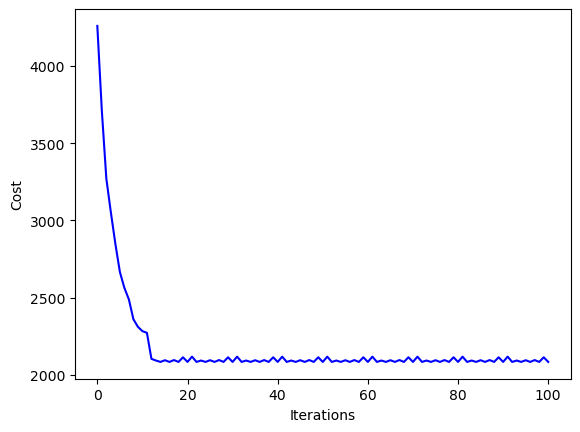

In [45]:
import matplotlib.pyplot as plt

plt.plot(costs_hist, 'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

C:\Users\halim.benhabiles\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\halim.benhabiles\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


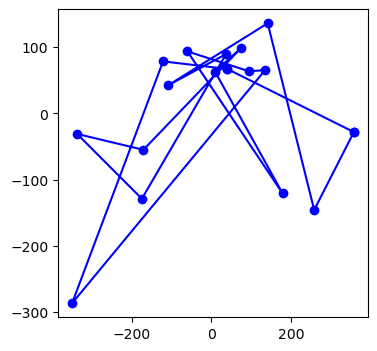

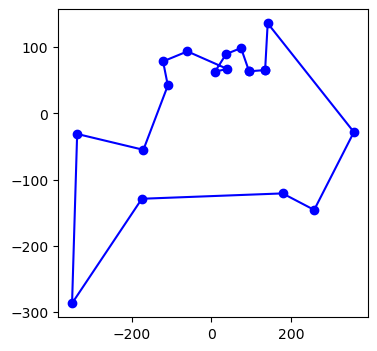

In [46]:
# convert distance matrix between cities into coordinates of cities 
from sklearn import manifold  # multidimensional scaling


mds_model = manifold.MDS(n_components=2, random_state=length_s,
                             dissimilarity='precomputed')
mds_fit = mds_model.fit(tsp_data)
mds_coords = mds_model.fit_transform(tsp_data)

# plot a random solution over cities
s = initial_solution(length_s)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(mds_coords[s, 0], mds_coords[s, 1], 'b-o')
plt.plot([mds_coords[s[0], 0], mds_coords[s[-1], 0]],
         [mds_coords[s[0], 1], mds_coords[s[-1], 1]], 'b-o')


# plot the best solution over cities
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(mds_coords[best_s, 0], mds_coords[best_s, 1], 'b-o')
plt.plot([mds_coords[best_s[0], 0], mds_coords[best_s[-1], 0]],
         [mds_coords[best_s[0], 1], mds_coords[best_s[-1], 1]], 'b-o')